In [1]:
import json
import glob

reports = glob.glob('local-memory-usage-*.json')
jsons = {}

for f in reports:
    cuda_version = f[len('local-memory-usage-'): -len('.json')]
    cuda_version = tuple(int(x) for x in cuda_version.split('.'))
    with open(f) as f:
        jsons[cuda_version] = json.load(f)


pairs = {}

for cuda_version, report in jsons.items():
    p = set()
    for file, functions in report.items():
        for function in functions:
            p.add((file, function))
    print(cuda_version)
    pairs[cuda_version] = set(p)

(10, 2)
(11, 0)
(11, 1)
(11, 2)


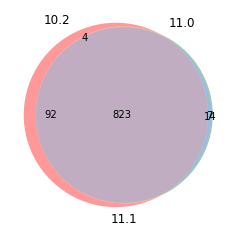

In [2]:
from matplotlib_venn import venn3
%matplotlib inline

venn3([pairs[(10, 2)], pairs[(11, 0)], pairs[(11, 1)]], set_labels=('10.2', '11.0', '11.1'))

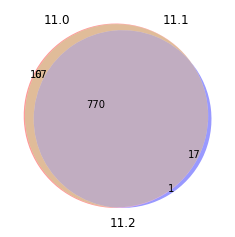

In [3]:
venn3([pairs[(11, 0)], pairs[(11, 1)], pairs[(11, 2)]], set_labels=('11.0', '11.1', '11.2'))

In [4]:
from collections import defaultdict

functions = defaultdict(lambda: set())
all_functions = pairs[(10, 2)] | pairs[(11, 0)] | pairs[(11, 1)] | pairs[(11, 2)]

def _(in_):
    if in_:
        return '+'
    return '-'

for f in all_functions:
    in_102 = f in pairs[(10, 2)]
    in_110 = f in pairs[(11, 0)]
    in_111 = f in pairs[(11, 1)]
    in_112 = f in pairs[(11, 2)]
    filename = f'{_(in_102)}{_(in_110)}{_(in_111)}{_(in_112)}.txt'
    file, function = f
    path = 'pytorch/aten/src/ATen/native/cuda/'
    assert file.startswith(path)
    file = file[len(path):]
    functions[filename].add(f'{file}\t{function}')

for in_102 in [True, False]:
    for in_110 in [True, False]:
        for in_111 in [True, False]:
            for in_112 in [True, False]:
                filename = f'{_(in_102)}{_(in_110)}{_(in_111)}{_(in_112)}.txt'
                with open(filename, 'w') as f:
                    f.write('\n'.join(functions[filename]))